In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# df = pd.read_csv(
#     r'c:/Users/Lenovo/OneDrive/Desktop/GenAI/VoyagersRegionalGenAI/savedFiles/monthly_milk_production.csv',
#     index_col='Date',
#     parse_dates=True
# )

# # Set the frequency of the datetime index to Month Start
# df.index.freq = 'MS'


In [130]:

# Set seed for reproducibility
np.random.seed(42)

# Generate 13 years of monthly data → 13 * 12 = 156 months
months = pd.date_range(start='1961-01-01', periods=168, freq='MS')

# Simulate production values with some trend
production = np.random.randint(500, 980, size=168) + np.linspace(0, 90, 168)

# Create DataFrame
df = pd.DataFrame({'Date': months, 'Production': production.astype(int)})
df.set_index('Date', inplace=True)



In [131]:
df.head()

,Production
Date,
1961-01-01,602
1961-02-01,935
1961-03-01,849
1961-04-01,771
1961-05-01,608


<Axes: xlabel='Date'>

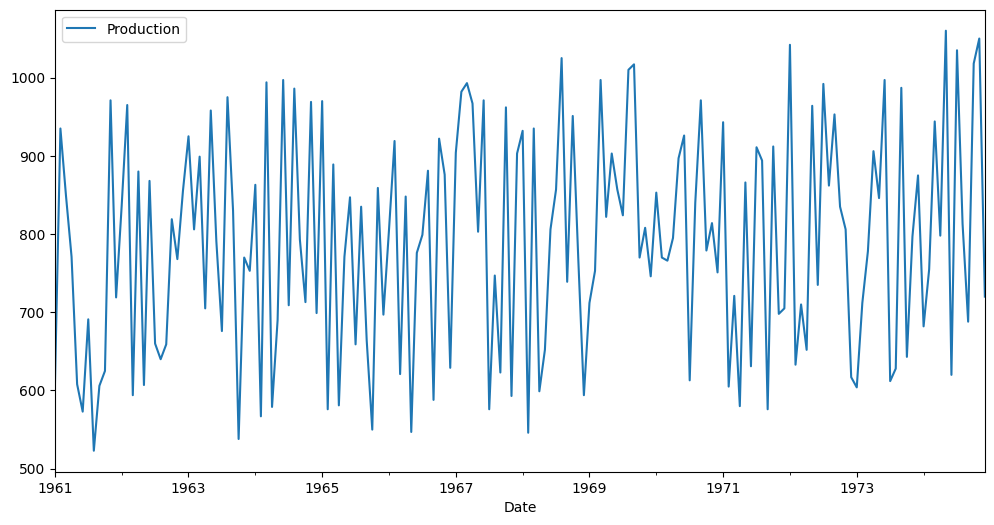

In [132]:
df.plot(figsize=(12,6))

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose

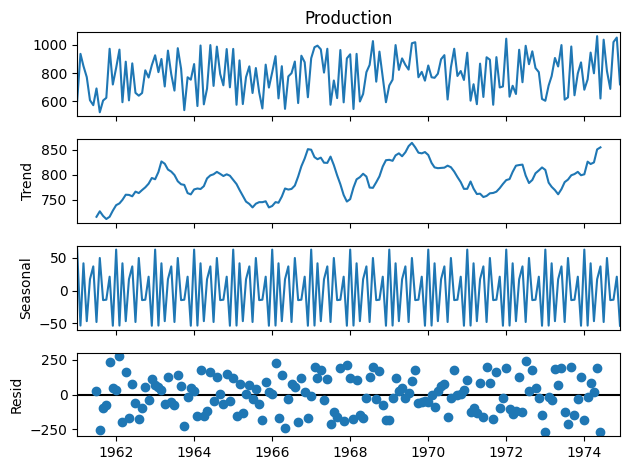

In [134]:
results = seasonal_decompose(df['Production'])
results.plot();

In [135]:
len(df)

168

In [136]:
train = df.iloc[:156]
test = df.iloc[156:]

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [138]:
df.head(),df.tail()

(            Production
 Date                  
 1961-01-01         602
 1961-02-01         935
 1961-03-01         849
 1961-04-01         771
 1961-05-01         608,
             Production
 Date                  
 1974-08-01         813
 1974-09-01         688
 1974-10-01        1018
 1974-11-01        1050
 1974-12-01         720)

In [139]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [140]:
scaled_train[:10]

array([[0.1522158 ],
       [0.7938343 ],
       [0.62813102],
       [0.477842  ],
       [0.16377649],
       [0.09633911],
       [0.32369942],
       [0.        ],
       [0.15992293],
       [0.19653179]])

In [141]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [142]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [143]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.1522158  0.7938343  0.62813102]
Predict this y: 
 [[0.477842]]


In [144]:
X.shape

(1, 3, 1)

In [145]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [147]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\Lenovo\OneDrive\Desktop\GenAI\VoyagersRegionalGenAI\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0995
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0816
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0756
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0745
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0758
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0726
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0748
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0722
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0731
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0735
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0725
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0713
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0708
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0696
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

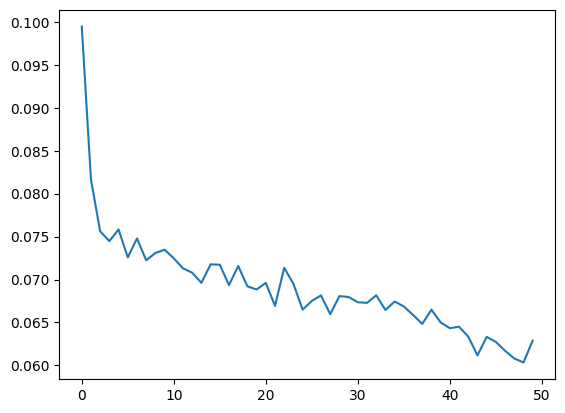

In [150]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [151]:
last_train_batch = scaled_train[-12:]

In [152]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [153]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


array([[0.46050197]], dtype=float32)

In [154]:
scaled_test[0]

array([0.30635838])

In [155]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [156]:
test_predictions

[array([0.46050197], dtype=float32),
 array([0.5565904], dtype=float32),
 array([0.4995541], dtype=float32),
 array([0.55913997], dtype=float32),
 array([0.5089178], dtype=float32),
 array([0.5673349], dtype=float32),
 array([0.48605305], dtype=float32),
 array([0.52906007], dtype=float32),
 array([0.5299419], dtype=float32),
 array([0.5075005], dtype=float32),
 array([0.5242214], dtype=float32),
 array([0.52569056], dtype=float32)]

In [157]:
test.head()

,Production
Date,
1974-01-01,682
1974-02-01,755
1974-03-01,944
1974-04-01,798
1974-05-01,1060


In [158]:
true_predictions = scaler.inverse_transform(test_predictions)

In [159]:
test['Predictions'] = true_predictions

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9272\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

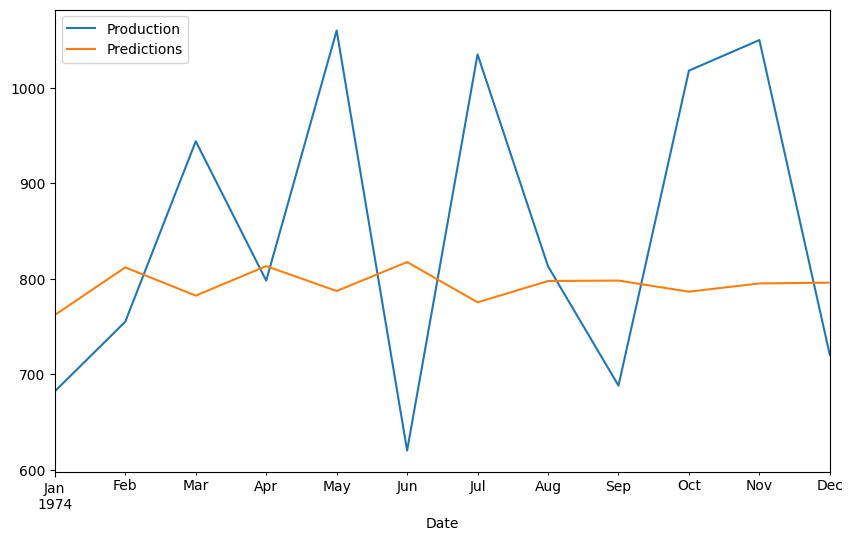

In [163]:
test.plot(figsize=(10,6))

In [164]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

171.6727528526135
